## Setup evnironment

In [21]:
import os
import numpy as np
import pandas as pd
import json
from skimage.io import imread

In [22]:
# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
from psf import compute, plotPSF

## Setup plotting

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper', font_scale=2.0)
sns.set_style('ticks')

## Define parameters

In [25]:
pxPerUmLat = 1.0/0.1383 # Inverse of pixel size, assumed to be the same between x and y
pxPerUmAx = 1.0/0.1028 
wavelength = 570
NA = 0.7
windowUm = [4,2,2]
options = {'pxPerUmLat':pxPerUmLat, 'pxPerUmAx':pxPerUmAx, 'wavelength':wavelength, 'NA':NA, 'windowUm':windowUm}
options['thresh'] = .05

In [26]:
options

{'pxPerUmLat': 7.230657989877079,
 'pxPerUmAx': 9.727626459143968,
 'wavelength': 570,
 'NA': 0.7,
 'windowUm': [4, 2, 2],
 'thresh': 0.05}

## Get PSF

In [27]:
im = imread('F:\\coverslip_align_20210712\\tiff_stacks\\without5meter_run1_HR\\21-07-12 193351_skewed-48_dsf1_allsecs\\crop.tif', plugin='tifffile')   

In [47]:
data, beads, maxima, centers, smoothed = compute(im, options)

In [48]:
PSF = pd.concat([x[0] for x in data])
PSF['Max'] = maxima
PSF = PSF.reset_index().drop(['index'],axis=1)
X_Profile = [x[1] for x in data]
Y_Profile = [x[2] for x in data]
Z_Profile = [x[3] for x in data]

In [49]:
PSF


,FWHM_X,FWHM_Y,FWHMax,Max
0,0.551542,0.470189,1.612893,8116
1,0.574320,0.489645,1.617021,9910
2,0.565814,0.453247,1.540107,7345
3,0.547211,0.475839,1.501785,10536
4,0.557632,0.468904,1.546225,9408
5,0.560723,0.470956,1.498083,14321
6,0.575717,0.469404,1.484006,9427
7,0.533740,0.450947,1.491693,2273
8,0.571973,0.497945,1.487337,10749
9,0.547221,0.463477,1.451814,12793


In [50]:
print('Detected beads:', len(PSF))
print('\nMean values:')
print(PSF.mean())
print('\nStandard deviation:')
print(PSF.std())

Detected beads: 100

Mean values:
FWHM_X        0.556689
FWHM_Y        0.473653
FWHMax        1.453224
Max       10226.540000
dtype: float64

Standard deviation:
FWHM_X       0.020997
FWHM_Y       0.016591
FWHMax       0.064651
Max       4208.699827
dtype: float64


## Plot max projection

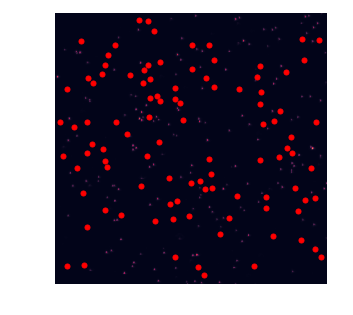

In [51]:
plt.figure(figsize=(5,5));
plt.imshow(smoothed);
plt.plot(centers[:, 2], centers[:, 1], 'r.', ms=10);
plt.xlim([0, smoothed.shape[0]])
plt.ylim([smoothed.shape[1], 0])
plt.axis('off');

## Plot 2D slices

In [52]:
beadInd = 10
average = beads[beadInd]

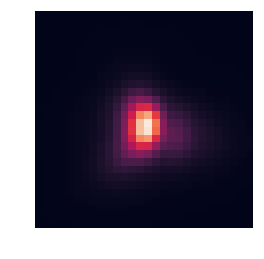

In [53]:
plt.imshow(average.mean(axis=0));
plt.axis('off');

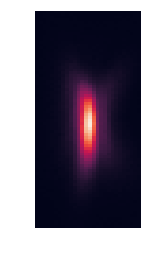

In [54]:
plt.imshow(average.mean(axis=1), aspect = pxPerUmLat/pxPerUmAx);
plt.axis('off');

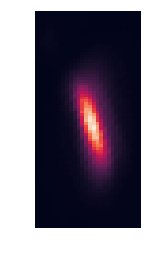

In [55]:
plt.imshow(average.mean(axis=2), aspect = pxPerUmLat/pxPerUmAx);
plt.axis('off');

## Plotting

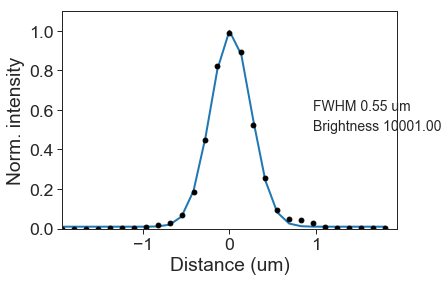

In [56]:
plotPSF(X_Profile[beadInd][0],X_Profile[beadInd][1],X_Profile[beadInd][2],X_Profile[beadInd][3],pxPerUmLat,PSF.Max.iloc[beadInd])

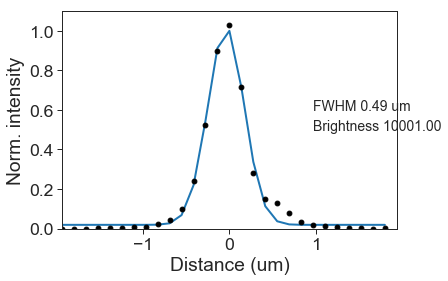

In [58]:
plotPSF(Y_Profile[beadInd][0],Y_Profile[beadInd][1],Y_Profile[beadInd][2],Y_Profile[beadInd][3],pxPerUmLat,PSF.Max.iloc[beadInd])

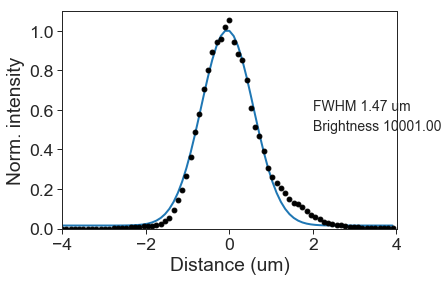

In [60]:
plotPSF(Z_Profile[beadInd][0],Z_Profile[beadInd][1],Z_Profile[beadInd][2],Z_Profile[beadInd][3],pxPerUmAx,PSF.Max.iloc[beadInd])